## Import dependencies

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

from datetime import datetime, timedelta


## Set global variables

In [50]:
ticker = 'RHM.DE'
startDate = '2023-01-01'

In [51]:
def stockData(ticker, start = '2015-01-01'):
    df = pd.DataFrame()
    stock = yf.Ticker(ticker)
    df = stock.history(start=start)
    return df

## Plot closing price

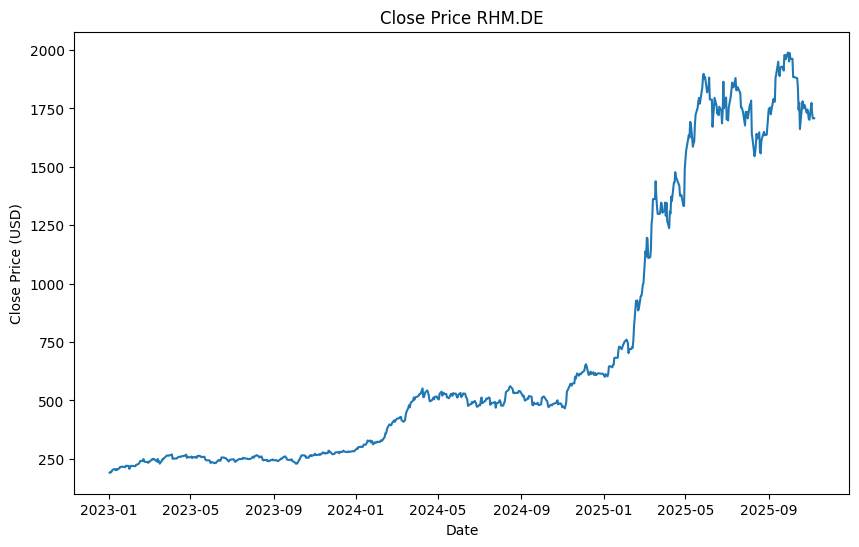

In [52]:
df = stockData(ticker, startDate)

plt.figure(figsize=(10,6))
plt.plot(df['Close'], label='Close Price')
plt.title(f'Close Price {ticker}')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.show()

## Log returns closing price

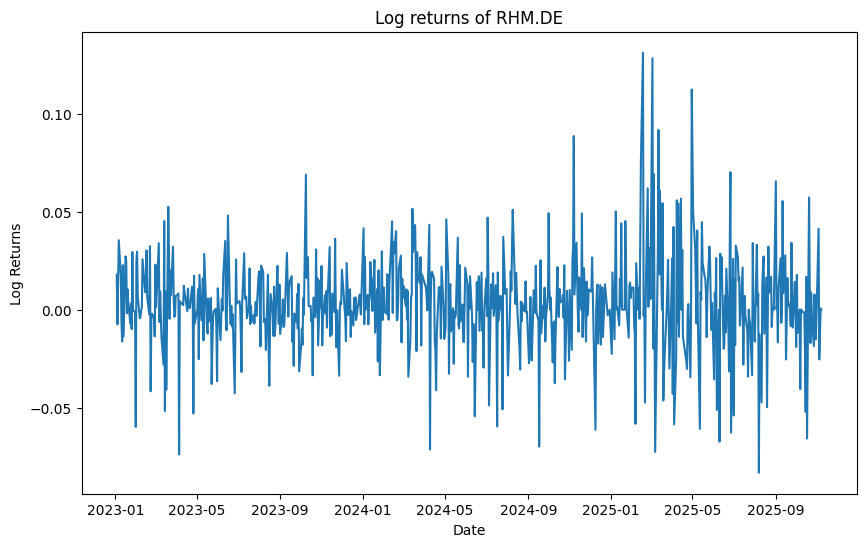

In [53]:
def logReturns(stockData):
    logReturns = np.log(1+stockData['Close'].pct_change())
    logReturns = logReturns[1:]

    return logReturns


LR = logReturns(df)


plt.figure(figsize=(10,6))
plt.plot(LR, label='Log Returns')
plt.title(f'Log returns of {ticker}')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.show()

## Simulation

In [54]:
numSimulations = 1000
simulatedDays = 100


lastPrice = df['Close'].iloc[-1]


def monteCarloFunction (numSimulations, simulatedDays, lastPrice, logReturn):
    dailyVolatility = np.std(logReturn)

    allSimulations = []

    for i in range(numSimulations):
        priceSeries = [lastPrice]

        for j in range(1, simulatedDays):
            price = priceSeries[-1] * (1+np.random.normal(0, dailyVolatility))
            priceSeries.append(price)

        allSimulations.append(priceSeries)
    
    simulation = pd.DataFrame(allSimulations).transpose()

    return simulation


logReturns = logReturns(df)
simulation = monteCarloFunction(numSimulations, simulatedDays, lastPrice, logReturns)

Text(0, 0.5, 'Price')

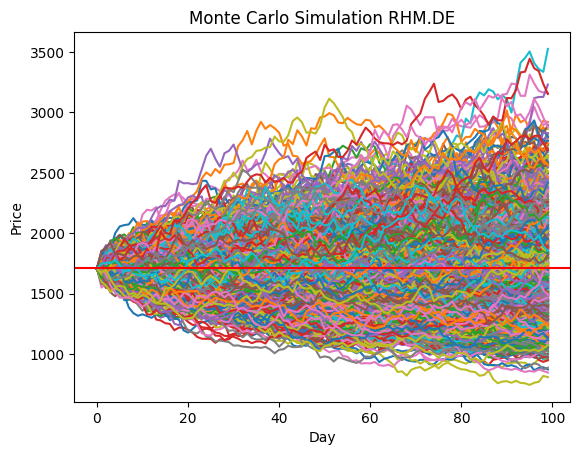

In [55]:
simulation.plot(legend=False)
plt.title(f'Monte Carlo Simulation {ticker}')
plt.axhline(y=lastPrice, color='r', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Price')